# Understanding data and business surrounding the data 

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loan_df = pd.read_csv('loan_analysis.csv')

In [5]:
loan_df.shape[0]

1048563

In [6]:
loan_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,679,1,30.0,2765,0.00,564,560,Individual,NaN,NaN
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,719,4,6.0,21470,0.00,699,695,Individual,NaN,NaN
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,699,0,NaN,7869,0.00,704,700,Joint App,71000.0,13.85
3,66310712,35000,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,...,789,0,NaN,7802,15897.65,679,675,Individual,NaN,NaN
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,699,3,12.0,21929,0.00,704,700,Individual,NaN,NaN


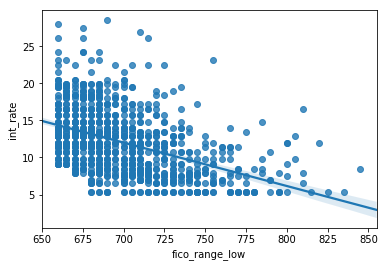

In [7]:
sns.regplot(x='fico_range_low', y='int_rate', data=loan_df[:1000])

In [8]:
loan_df['loan_status'].value_counts()

Fully Paid            482595
Current               419550
Charged Off           129187
Late (31-120 days)     10879
In Grace Period         4227
Late (16-30 days)       2104
Default                   21
Name: loan_status, dtype: int64

In [9]:
loan_stat= loan_df[(loan_df['loan_status']).isin(['Fully Paid', 'Charged Off', 'Default'])]

In [10]:
loan_stat['loan_status'].value_counts()

Fully Paid     482595
Charged Off    129187
Default            21
Name: loan_status, dtype: int64

In [11]:
loan_stat.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,564.314683
Default,591.142857
Fully Paid,705.780018


In [12]:
loan_stat['loan_status'] = loan_stat['loan_status'].replace({'Charged Off':'Default' , 'Fully Paid':'Good'})

In [13]:
loan_stat['loan_status'].value_counts()

Good       482595
Default    129208
Name: loan_status, dtype: int64

In [14]:
loan_stat['fico_range_low'].min()

660

In [15]:
loan_stat['fico_range_low'].max()

845

In [16]:
loan_stat['last_fico_range_low'].min()

0

In [17]:
loan_stat['last_fico_range_low']= loan_stat.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'], axis=1)

In [18]:
loan_stat['last_fico_range_low'].min()

500

In [19]:
loan_stat['last_fico_range_low'].max()

845

In [20]:
#Creating a new column
import math
loan_stat['fico_score']= loan_stat['last_fico_range_low'].apply(lambda x: (math.ceil(x/10))*10)

In [21]:
loan_stat.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,1,30.0,2765,0.0,564,560,Individual,NaN,NaN,560
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,4,6.0,21470,0.0,699,695,Individual,NaN,NaN,700
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,0,NaN,7869,0.0,704,700,Joint App,71000.0,13.85,700
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,3,12.0,21929,0.0,704,700,Individual,NaN,NaN,700
5,68426831,11950,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,0,NaN,8822,0.0,759,755,Individual,NaN,NaN,760


In [22]:
loan_stat.isnull().sum()

id                             0
loan_amnt                      0
int_rate                       0
installment                    0
grade                          0
emp_title                  38883
home_ownership                 0
annual_inc                     0
loan_status                    0
purpose                        0
title                       8356
dti                          218
delinq_2yrs                    0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq    298478
revol_bal                      0
out_prncp                      0
last_fico_range_high           0
last_fico_range_low            0
application_type               0
annual_inc_joint          598424
dti_joint                 598426
fico_score                     0
dtype: int64

In [23]:
loan_stat[loan_stat['dti'].isnull()].head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
18202,66415476,20000,16.99,712.96,D,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,1,NaN,7161,0.0,649,645,Joint App,185000.0,5.31,650
65620,65199509,3700,12.59,123.94,C,NaN,MORTGAGE,0.0,Default,credit_card,...,1,10.0,10649,0.0,539,535,Joint App,40988.0,28.72,540
422319,130138254,40000,15.04,1387.40,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0,6.0,5646,0.0,584,580,Joint App,200000.0,22.90,580
422890,130712137,21000,11.98,697.30,B,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,0,NaN,11846,0.0,704,700,Joint App,70000.0,8.45,700
424933,129700950,16800,7.34,335.37,A,NaN,MORTGAGE,0.0,Good,home_improvement,...,0,NaN,288,0.0,759,755,Joint App,130000.0,8.90,760


In [24]:
loan_stat['dti_final']= loan_stat.apply(lambda x: x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis=1)

In [25]:
loan_stat['annual_inc_final']= loan_stat.apply(lambda x: x['annual_inc_joint'] if pd.isnull(x['annual_inc']) else x['annual_inc'], axis=1)

In [26]:
loan_stat.isnull().sum()

id                             0
loan_amnt                      0
int_rate                       0
installment                    0
grade                          0
emp_title                  38883
home_ownership                 0
annual_inc                     0
loan_status                    0
purpose                        0
title                       8356
dti                          218
delinq_2yrs                    0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq    298478
revol_bal                      0
out_prncp                      0
last_fico_range_high           0
last_fico_range_low            0
application_type               0
annual_inc_joint          598424
dti_joint                 598426
fico_score                     0
dti_final                      0
annual_inc_final               0
dtype: int64

In [27]:
loan_stat['fico_score'].value_counts().sort_index()

500     3585
510     8223
520     9792
530    10984
540    12333
550    12817
560    12659
570    12380
580    11723
590    10902
600    10509
610    10775
620    11093
630    11947
640    13946
650    17249
660    25423
670    33494
680    37968
690    40444
700    40425
710    39677
720    37891
730    33519
740    27707
750    23225
760    19593
770    17280
780    15495
790    12844
800    10284
810     7646
820     4769
830     2384
840      694
850      124
Name: fico_score, dtype: int64

In [28]:
fico_df= loan_stat['fico_score'].value_counts().sort_index()

In [29]:
fico_df.head()

500     3585
510     8223
520     9792
530    10984
540    12333
Name: fico_score, dtype: int64

In [30]:
loan_stat[loan_stat['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     3183
510     7191
520     8370
530     9254
540    10127
550    10164
560     9703
570     9060
580     8004
590     6852
600     5881
610     5195
620     4468
630     3708
640     2898
650     2310
660     4091
670     5232
680     3918
690     2875
700     2027
710     1515
720     1024
730      613
740      447
750      298
760      230
770      167
780      136
790       92
800       72
810       52
820       28
830       14
840        6
850        3
Name: fico_score, dtype: int64

In [31]:
loan_stat[['fico_score', 'dti_final', 'loan_amnt','annual_inc_final']].groupby('fico_score').mean()

,dti_final,loan_amnt,annual_inc_final
fico_score,,,
500,19.737013,13660.718271,63396.102921
510,19.747810,13889.672261,65446.522628
520,20.085761,14186.139195,68261.387077
530,20.253199,14487.008376,69041.523403
540,20.770446,14756.367064,69948.952428
550,20.788260,14864.664118,70157.608170
560,20.974137,15115.060431,72611.186614
570,20.731022,15058.697496,72955.585910
580,20.742532,15020.675168,73070.848848


In [32]:
fico_df.head()

500     3585
510     8223
520     9792
530    10984
540    12333
Name: fico_score, dtype: int64

In [33]:
fico_df= pd.concat([fico_df, pd.DataFrame(loan_stat[loan_stat['loan_status']=='Default']['fico_score'].value_counts().sort_index())],ignore_index=True, axis=1)

In [34]:
fico_df= pd.concat([fico_df, pd.DataFrame(loan_stat[['fico_score', 'dti_final', 'loan_amnt','annual_inc_final', 'int_rate']].groupby('fico_score').mean())],ignore_index=True, axis=1)

In [35]:
fico_df.head()

,0,1,2,3,4,5
500,3585,3183,19.737013,13660.718271,63396.102921,15.352285
510,8223,7191,19.747810,13889.672261,65446.522628,15.440212
520,9792,8370,20.085761,14186.139195,68261.387077,15.312451
530,10984,9254,20.253199,14487.008376,69041.523403,15.449011
540,12333,10127,20.770446,14756.367064,69948.952428,15.271022


In [36]:
fico_df= fico_df.reset_index()

In [37]:
fico_df.columns = ['fico_score', 'loan_total','default_total', 'dti', 'avg_loan_amnt', 'avg_annual_inc', 'avg_int_rate']

In [38]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,avg_annual_inc,avg_int_rate
0,500,3585,3183,19.737013,13660.718271,63396.102921,15.352285
1,510,8223,7191,19.747810,13889.672261,65446.522628,15.440212
2,520,9792,8370,20.085761,14186.139195,68261.387077,15.312451
3,530,10984,9254,20.253199,14487.008376,69041.523403,15.449011
4,540,12333,10127,20.770446,14756.367064,69948.952428,15.271022


In [39]:
fico_df['default_rate']= (fico_df.default_total/fico_df.default_total.sum())*100

In [40]:
fico_df['actual_default_rate']= (fico_df.default_total/fico_df.loan_total.sum())*100

In [41]:
fico_df.head(10)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,avg_annual_inc,avg_int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.718271,63396.102921,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.672261,65446.522628,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.139195,68261.387077,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.008376,69041.523403,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.367064,69948.952428,15.271022,7.837750,1.655271
5,550,12817,10164,20.788260,14864.664118,70157.608170,15.048212,7.866386,1.661319
6,560,12659,9703,20.974137,15115.060431,72611.186614,14.937358,7.509597,1.585968
7,570,12380,9060,20.731022,15058.697496,72955.585910,14.830960,7.011950,1.480869
8,580,11723,8004,20.742532,15020.675168,73070.848848,14.791581,6.194663,1.308264
9,590,10902,6852,20.737378,14849.385434,72049.620998,14.712871,5.303077,1.119968


In [42]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,avg_annual_inc,avg_int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584598,8038.473537,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231601,63396.102921,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181178,72364.301711,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024776,74919.065437,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673885,80706.824486,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459677,98683.805747,15.449011,7.866386,1.661319


In [43]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,avg_annual_inc,avg_int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.832335,-0.803379,-0.443113,-0.443113
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,1.000000,-0.946145,-0.741849,-0.741849
avg_int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.741849,0.850278,1.000000,1.000000


In [44]:
fico_df.corr('spearman')

,fico_score,loan_total,default_total,dti,avg_loan_amnt,avg_annual_inc,avg_int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.043243,-0.939511,-0.936422,0.661261,0.966281,-0.997169,-0.939511,-0.939511
loan_total,0.043243,1.000000,0.077992,0.029344,-0.344916,0.048649,-0.035006,0.077992,0.077992
default_total,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.899871,0.950322,1.000000,1.000000
dti,-0.936422,0.029344,0.967310,1.000000,-0.576577,-0.890862,0.937709,0.967310,0.967310
avg_loan_amnt,0.661261,-0.344916,-0.601544,-0.576577,1.000000,0.711969,-0.656371,-0.601544,-0.601544
avg_annual_inc,0.966281,0.048649,-0.899871,-0.890862,0.711969,1.000000,-0.966795,-0.899871,-0.899871
avg_int_rate,-0.997169,-0.035006,0.950322,0.937709,-0.656371,-0.966795,1.000000,0.950322,0.950322
default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.899871,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.899871,0.950322,1.000000,1.000000
